In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Создайте диапазон значений x
x_values = np.linspace(10000, 20000, 1000)  # 1000 точек от 10000 до 20000

In [18]:
# Задайте значения y для горизонтальных линий
y_values = [7700, 8000, 8100, 8200]

In [19]:
# Определите координаты для прямой линии
x_line = np.array([12000, 20000])
y_line = np.array([8500, 7300])

In [20]:
# Вычислите коэффициенты для прямой линии
coefficients = np.polyfit(x_line, y_line, 1)
coefficients

array([-1.50e-01,  1.03e+04])

In [21]:
# Вычислите значения y для прямой линии
y_line_values = np.polyval(coefficients, x_values)

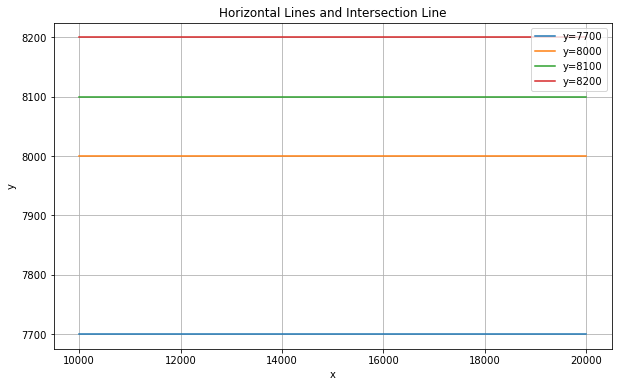

In [22]:
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
plt.show()

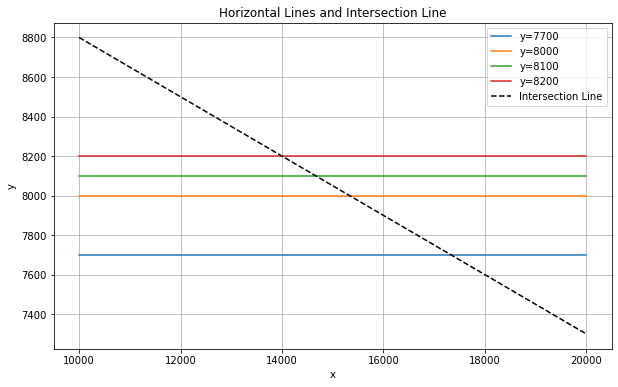

In [23]:
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

# Добавьте прямую линию
plt.plot(x_values, y_line_values, 'k--', label='Intersection Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
plt.show()

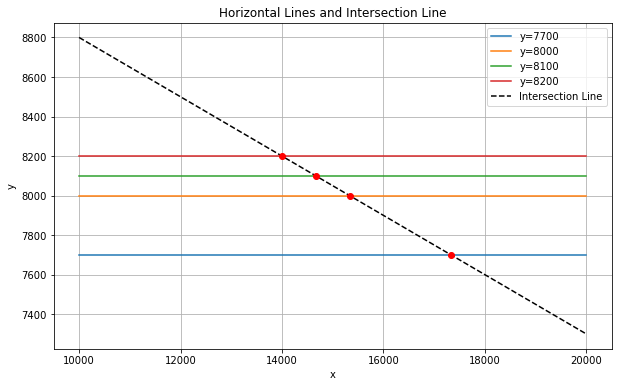

In [24]:
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

# Добавьте прямую линию
plt.plot(x_values, y_line_values, 'k--', label='Intersection Line')

# Найдите и добавьте точки пересечения
for y in y_values:
    x_intersect = (y - coefficients[1]) / coefficients[0]
    plt.plot(x_intersect, y, 'ro')  # 'ro' указывает на красные кружки

plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
plt.show()

point 0: y1 = 7700, y2 = 8000
point 1: y1 = 8000, y2 = 8100
point 2: y1 = 8100, y2 = 8200


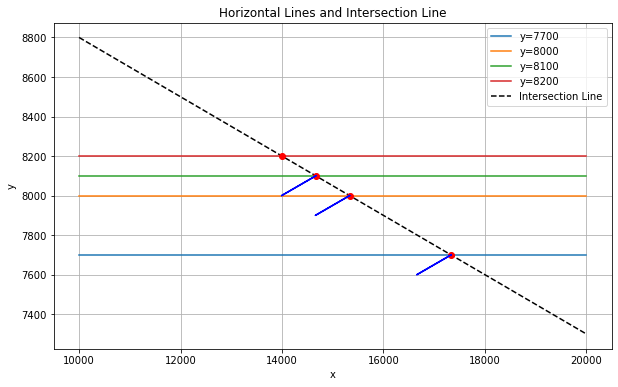

In [31]:
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

# Добавьте прямую линию
plt.plot(x_values, y_line_values, 'k--', label='Intersection Line')

# Найдите и добавьте точки пересечения
for y in y_values:
    x_intersect = (y - coefficients[1]) / coefficients[0]
    plt.plot(x_intersect, y, 'ro')  # 'ro' указывает на красные кружки
    
###
# Задаем длину вертикального катета
vertical_leg = 100

# Пройдемся по парам y_values
for i in range(len(y_values)-1):
    # Выберите две точки для построения прямоугольного треугольника
    y1, y2 = y_values[i], y_values[i+1]
    print(f'point {i}: y1 = {y1}, y2 = {y2}')

    # Рассчитайте координаты x для точек пересечения
    x1_intersect = (y1 - coefficients[1]) / coefficients[0]
    x2_intersect = (y2 - coefficients[1]) / coefficients[0]
    
    # Угол наклона линии
    theta = np.arctan(coefficients[0])
    
    # Вычислить горизонтальный катет
    horizontal_leg = np.abs(vertical_leg / np.sin(theta))
    
    # Вычислить конечные координаты x и y для гипотенузы
    if theta > 0:  # угол в верхнем полукруге
        x_end = x1_intersect + horizontal_leg
        y_end = y1 + vertical_leg
    else:  # угол в нижнем полукруге
        x_end = x1_intersect - horizontal_leg
        y_end = y1 - vertical_leg

    # Постройте прямоугольный треугольник
    plt.plot([x1_intersect, x_end, x1_intersect], 
             [y1, y_end, y1], 'b-')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Пусть длина гипотенузы и угол заданы следующим образом:
hypotenuse_length = 500  # Например, 500 единиц
line_angle = np.arctan(coefficients[0])  # Угол наклона линии

# Тогда длина катета, параллельного оси OX, будет равна:
x_leg_length = hypotenuse_length * np.cos(line_angle)

# А длина катета, параллельного оси OY, будет равна:
y_leg_length = hypotenuse_length * np.sin(line_angle)

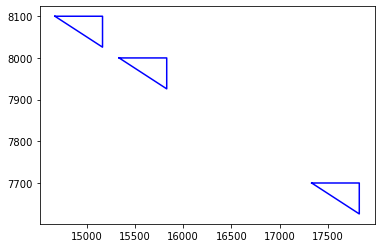

In [33]:
for i in range(len(y_values)-1):
    y1 = y_values[i]  # Начальная точка по оси OY
    x1_intersect = (y1 - coefficients[1]) / coefficients[0]  # Начальная точка по оси OX

    # Конечные точки прямоугольного треугольника
    x2_intersect = x1_intersect + x_leg_length
    y2 = y1 + y_leg_length

    # Постройте прямоугольный треугольник
    plt.plot([x1_intersect, x2_intersect, x2_intersect, x1_intersect], 
             [y1, y1, y2, y1], 'b-')
